#### Objective & Description:

Collect or use job market data to explore data related positions or machine learning related positions in a particular region (e.g., US, India) from a Job site in this case, Naukri.com.

### Importing required packages

In [6]:
import pandas as pd
from pprint import pprint
import re

import seaborn as sns
import matplotlib.pyplot as plt

<p>
In the below code, I've already scrapped the first 50 pages of all the job details for the job title Data Scientist in India, which were listed on Naukri.com and took me a significant amount of time. To avoid scraping the same info, again and again, every time the code is executed, I saved the data frame in a CSV file locally. Here I'll just load the data from the CSV file 
</p>

# a. Loading Web Scraped Data

In [7]:
def make_pretty(styler):
    styler.set_caption('caption')
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

In [8]:
# Example usage
df_file_name = "naukri_Data Scientist_India_jobs.csv"
print(f'Loading from already saved file {df_file_name}')
df = pd.read_csv(df_file_name)
df.info()

Loading from already saved file naukri_Data Scientist_India_jobs.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            990 non-null    object
 1   Company          990 non-null    object
 2   Company_Rating   990 non-null    object
 3   Company_Reviews  990 non-null    object
 4   Location         990 non-null    object
 5   Salary_Range     990 non-null    object
 6   Experience       990 non-null    object
 7   Post_Day         990 non-null    object
 8   Tags             990 non-null    object
 9   Description      990 non-null    object
dtypes: object(10)
memory usage: 77.5+ KB


In [9]:
df.head().style

,Title,Company,Company_Rating,Company_Reviews,Location,Salary_Range,Experience,Post_Day,Tags,Description
0,Lead Data Scientist / Lead Machine learning Engineer,Atyeti,4.3,129,"['Hybrid', 'Pune(Kharadi)']",Not disclosed,8-12 Yrs,Just Now,"['Tensorflow', 'Machine Learning', 'Scikit-Learn', 'Python', 'Machine', 'Data']","Experience in designing ML pipelines, including model versioning, model deployment, mod..."
1,Data Scientist / Data Analyst,.,No rating,No reviews,['Remote'],12-16 Lacs PA,3-5 Yrs,1 Day Ago,"['Data Science', 'NLP', 'Machine Learning', 'AI /ML', 'Data Analyst', 'SQL', 'Science', 'Aiml']","Key Responsibilities:Data Analysis:Collect, clean, and preprocess data for analysis.Pe..."
2,Data Scientist,Rlabs Enterprise Services,3.7,137,"['Hybrid', 'Hyderabad', 'Bengaluru']",Not disclosed,4-9 Yrs,Just Now,"['Machine Learning', 'Python', 'SQL', 'Data Visualization', 'Data Modeling', 'Statistics', 'R Program', 'Data']",Preferred experience in Data ModellingExperience in SQL and Python
3,Data Scientist - BLR/ HYD/ GGN,Genpact,3.9,27557,"['Hybrid', 'Hyderabad', 'Gurugram', 'Bengaluru']",Not disclosed,6-11 Yrs,6 Days Ago,"['Data Science', 'Predictive Modeling', 'Decision Tree', 'Text Analytics', 'Natural Language Processing', 'Neural Networks', 'Text Mining', 'LLM']","Furthermore, please do note that Genpact does not charge fees to process job applicatio..."
4,Data Scientist,Johnson and Johnson Kenvue,4.3,31,['Bengaluru'],Not disclosed,4-6 Yrs,3 Days Ago,"['Supply chain', 'Computer science', 'Data analysis', 'Operations research', 'data science', 'Coding', 'Machine learning', 'Data mining']",Required Qualifications: . Strong knowledge and understanding of Probability & Statisti...


In [10]:
df.describe(include='all')

,Title,Company,Company_Rating,Company_Reviews,Location,Salary_Range,Experience,Post_Day,Tags,Description
count,990,990,990,990,990,990,990,990,990,990
unique,291,669,38,238,152,44,88,33,918,896
top,Data Scientist,IBM,No rating,No reviews,['Bengaluru'],Not disclosed,5-10 Yrs,30+ Days Ago,['Data Scientist'],"Undertaking data collection, preprocessing and..."
freq,458,18,269,269,297,906,79,565,9,14


---
# b. Market Data Visualization
---

##### When there are large amounts of data available it is frequently useful to create a data visualization. We used the plotting tools to create visualizations

##### Step 1: Identify an Ideal Job
* Choosing "Data Scientist" as an ideal job title, we have good no of entries for this title in our scraped data to find out key skills required

In [11]:
df.Title.value_counts()

Title
Data Scientist                                 458
Senior Data Scientist                          102
Lead Data Scientist                             32
Sr. Data Scientist                              12
Data Scientist: Artificial Intelligence          9
                                              ... 
Data Scientist - AEP                             1
Data Scientist- Gen AI                           1
Opportunity | Data Scientist | Tavant India      1
Data Scientist Maruti Suzuki                     1
Data Scientist / Data Analyst                    1
Name: count, Length: 291, dtype: int64

In [12]:
ideal_job = 'Data Scientist'
ideal_job_titles = df[df.Title.str.contains(ideal_job, case=False, na=False)]
print(type(ideal_job_titles))
ideal_job_titles.Title.value_counts()

<class 'pandas.core.frame.DataFrame'>


Title
Data Scientist                                458
Senior Data Scientist                         102
Lead Data Scientist                            32
Sr. Data Scientist                             12
Data Scientist: Artificial Intelligence         9
                                             ... 
Graduate Data Scientist                         1
Urgent Hiring For Data Scientist                1
Data Scientist With GEN AI - PER ROLE- BLR      1
Data Scientist - AEP                            1
Data Scientist- Gen AI                          1
Name: count, Length: 288, dtype: int64

In [13]:
# Function to normalize and combine titles
def normalize_titles(title):
    if re.match(r'^(lead|lead/|/lead|manager)', title, re.IGNORECASE):
        return "Lead Data Scientist"
    elif re.match(r'^(sr\.?|senior)', title, re.IGNORECASE):
        return "Senior Data Scientist"
    elif re.match(r'^(data scientist)', title, re.IGNORECASE):
        return "Data Scientist"    
    elif re.match(r'^(staff)', title, re.IGNORECASE):
        return "Staff Data Scientist"
    elif re.search(r'\b(opening|junior|nlp|ai|expert|assistant)\b', title, re.IGNORECASE):
        return "Data Scientist"
    return title.title()  # Return title in Pascal Case

# Simplify, normalize, and apply Pascal Case
ideal_job_titles.loc[:, 'Fixed_Title'] = ideal_job_titles.Title.apply(normalize_titles)

# Count occurrences of each normalized title
titles_counts = ideal_job_titles.Fixed_Title.value_counts()

# Replace all the occourances below 4 with "Others"
ideal_job_titles.loc[:, 'Fixed_Title'] = ideal_job_titles.Fixed_Title.apply(lambda x: x if titles_counts[x] > 3 else 'Others')

# Count occurrences again after replacing single entries with "Others"
final_titles_counts = ideal_job_titles.Fixed_Title.value_counts()
    
# Print the final counts to ensure everything is correct
print(ideal_job_titles.Fixed_Title.value_counts())
print(ideal_job_titles.info())

Fixed_Title
Data Scientist              670
Senior Data Scientist       200
Others                       55
Lead Data Scientist          48
Staff Data Scientist          9
Associate Data Scientist      5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 989
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            987 non-null    object
 1   Company          987 non-null    object
 2   Company_Rating   987 non-null    object
 3   Company_Reviews  987 non-null    object
 4   Location         987 non-null    object
 5   Salary_Range     987 non-null    object
 6   Experience       987 non-null    object
 7   Post_Day         987 non-null    object
 8   Tags             987 non-null    object
 9   Description      987 non-null    object
 10  Fixed_Title      987 non-null    object
dtypes: object(11)
memory usage: 92.5+ KB
None


C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\2669475368.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideal_job_titles.loc[:, 'Fixed_Title'] = ideal_job_titles.Title.apply(normalize_titles)


##### Extracting the Locations for our ideal Job, "Data Scientist"

In [14]:
ideal_job_location = (ideal_job_titles
    .Location
    .apply(lambda x: eval(x.strip().title()))
    .explode()
)

# Count the occurrences of each location
location_counts = ideal_job_location.value_counts()

# Replace locations with fewer than 10 occurrences with "Others"
normalized_locations = ideal_job_location.apply(lambda x: x if location_counts[x] >= 10 else 'Others')

# Recount occurrences including the "Others" category
final_location_counts = normalized_locations.value_counts()

# Print the final counts to ensure everything is correct
print(final_location_counts.head())

Location
Bengaluru    452
Hyderabad    193
Pune         170
Chennai      161
Mumbai       138
Name: count, dtype: int64


##### Extracting the skills required for our ideal job, "Data Scientist"

In [15]:
ideal_job_skills = (ideal_job_titles
    .Tags
    .apply(lambda x: eval(x.strip().title()))
    .explode()
)

# Count the occurrences of each skill
skill_counts = ideal_job_skills.value_counts().to_dict()

# Replace skills with only one occurrence with "Others"
normalized_skills = ideal_job_skills.apply(lambda x: x if skill_counts.get(x,0) > 10 else 'Others')

# Recount occurrences including the "Others" category
final_skill_counts = normalized_skills.value_counts()

# Print the final counts to ensure everything is correct
print(final_skill_counts.head())  # Show the top 20 skills

Tags
Others              1887
Machine Learning     610
Data Science         302
Python               241
Data Analysis        215
Name: count, dtype: int64


#### Extraction Information about Salary Range

In [16]:
# Function to convert salary range to midpoint
def convert_to_midpoint(salary_range):
    if 'Lacs PA' in salary_range:
        # Extract the numeric part for the range
        min_salary, max_salary = salary_range.replace('Lacs PA', '').strip().split('-')
        min_salary = float(min_salary.strip())
        max_salary = float(max_salary.strip())
        return ((min_salary + max_salary) / 2) * 100  # Calculate midpoint in thousands
    return None

# Step 1: Filter out rows where Salary_Range is 'Not disclosed' or 'Unpaid'
ideal_job_salary = ideal_job_titles[
    ~ideal_job_titles.Salary_Range.isin(['Not disclosed', 'Unpaid'])
].head(10)
# Step 2: Convert Salary_Range to midpoint for each row

ideal_job_salary['Salary_in_Thousands'] = ideal_job_salary.Salary_Range.apply(convert_to_midpoint)
ideal_job_salary.head()


,Title,Company,Company_Rating,Company_Reviews,Location,Salary_Range,Experience,Post_Day,Tags,Description,Fixed_Title,Salary_in_Thousands
1,Data Scientist / Data Analyst,.,No rating,No reviews,['Remote'],12-16 Lacs PA,3-5 Yrs,1 Day Ago,"['Data Science', 'NLP', 'Machine Learning', 'A...","Key Responsibilities:Data Analysis:Collect, cl...",Data Scientist,1400.0
12,Data Scientist - Phd only,NDS Infoserv,2.3,8,['Mumbai'],12-15 Lacs PA,0-2 Yrs,4 Days Ago,"['Natural Language Processing', 'Phd', 'Deep L...",Bachelor Accommodation providedCandidate shoul...,Data Scientist,1350.0
28,Data Scientist With GEN AI - PER ROLE- BLR,IBM,4.1,20301,"['Hyderabad', 'Gurugram', 'Bengaluru']",25-40 Lacs PA,7-12 Yrs,12 Days Ago,"['GEN AI', 'LLM', 'Data Science', 'NLP', 'Data...","Hi, We are looking for GEN AI Engineer role. E...",Data Scientist,3250.0
33,Data Scientist,Hexaware Technologies,3.6,5084,"['Hybrid', 'Bengaluru']",16-30 Lacs PA,9-14 Yrs,7 Days Ago,"['Data Science', 'Natural Language Processing'...",Looking for Data Scientist candidates who is h...,Data Scientist,2300.0
38,Data Scientist,FitFinder,No rating,No reviews,['Remote'],35-50 Lacs PA,5-10 Yrs,3 Days Ago,"['Data Scientist', 'Predictive Modeling', 'Mat...",Technical Expertise: Strong knowledge of data ...,Data Scientist,4250.0


##### Step 2: Create Visualizations

#### Visualization for Job Title

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\589917977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


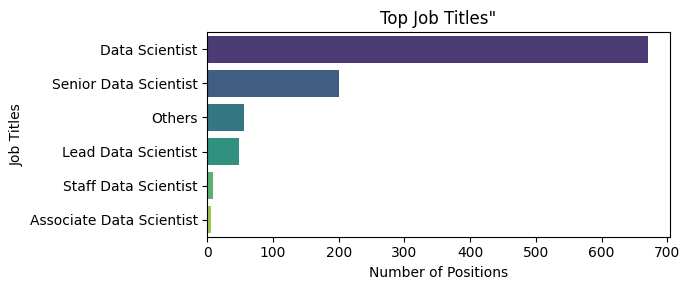

In [17]:
# Generate the plot
plt.figure(figsize=(7, 3))
sns.barplot(
    x=ideal_job_titles.Fixed_Title.value_counts(), y=ideal_job_titles.Fixed_Title.value_counts().index, palette='viridis', 
    #hue=ideal_job_titles.Fixed_Title.value_counts().index, 
    dodge=False #, legend=False
)

plt.title('Top Job Titles"')
plt.xlabel('Number of Positions')
plt.ylabel('Job Titles')
plt.tight_layout()
plt.show()

#### Visualization for Locations where the roles are offered (including remote)

In [18]:
final_location_counts

Location
Bengaluru             452
Hyderabad             193
Pune                  170
Chennai               161
Mumbai                138
Others                112
Gurugram               83
Hybrid                 65
Kolkata                60
New Delhi              55
Noida                  46
Remote                 19
Ahmedabad              18
Mumbai (All Areas)     13
Kochi                  13
Navi Mumbai            10
Coimbatore             10
Name: count, dtype: int64

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\2007190617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


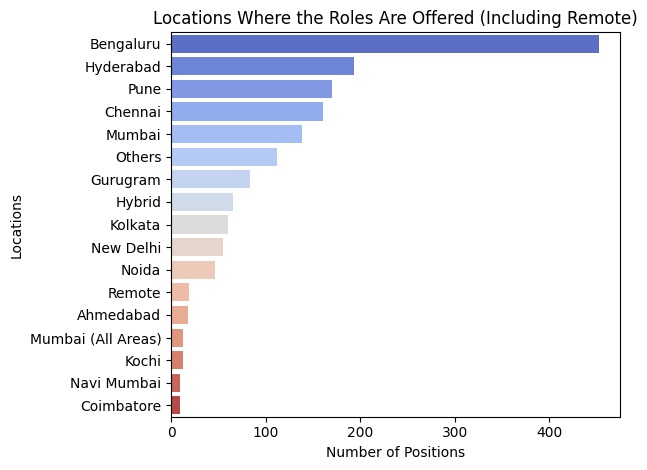

In [19]:
# Generate the plot
#plt.figure(figsize=(6, 4))
sns.barplot(
    x=final_location_counts.values, y=final_location_counts.index, 
    #hue=final_location_counts.index, 
    palette='coolwarm', dodge=False #legend=False
)
plt.title('Locations Where the Roles Are Offered (Including Remote)')
plt.xlabel('Number of Positions')
plt.ylabel('Locations')
plt.tight_layout()
plt.show()

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\1654798443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


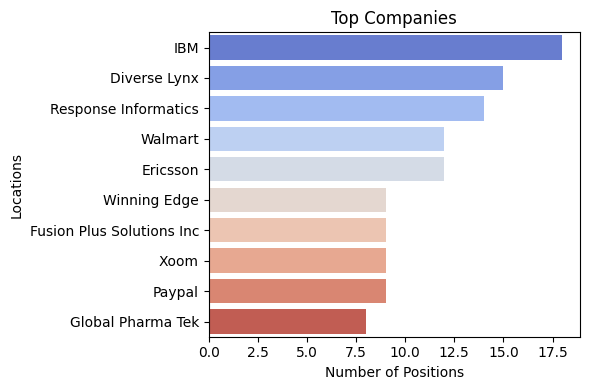

In [20]:
# Generate the plot
company_count = ideal_job_titles.Company.value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(
    x=company_count.values, y=company_count.index, 
    #hue=company_count.index, 
    palette='coolwarm', dodge=False #, legend=False
)
plt.title('Top Companies')
plt.xlabel('Number of Positions')
plt.ylabel('Locations')
plt.tight_layout()
plt.show()

#### A single job listing contains multiple locations, Hence the Actual Location records are more than the Job Listing

#### Visualization for Key Skills

In [21]:
top_skills = final_skill_counts[final_skill_counts.index != 'Others'].head(15)

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\2462097122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


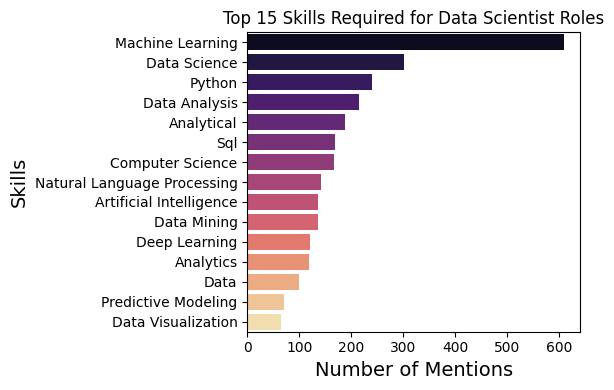

In [22]:
# Count the occurrences of each job type (Full-time or Part-time)
# Step 3: Visualization
plt.figure(figsize=(6, 4))
sns.barplot(
    x=top_skills.values, y=top_skills.index, palette='magma', 
    #hue=top_skills.index, 
    dodge=False #, legend=False
)
plt.title('Top 15 Skills Required for Data Scientist Roles')
plt.xlabel('Number of Mentions', fontsize=14)
plt.ylabel('Skills', fontsize=14)
plt.tight_layout()
plt.show()

#### These are the top 15 Skills for the Ideal Job Title Data Scientist

##### Visualization for Salary Range (Top 10 for Ideal Job Role)

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\3442457756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ideal_job_salary_sorted.index, y='Salary_in_Thousands', data=ideal_job_salary_sorted,


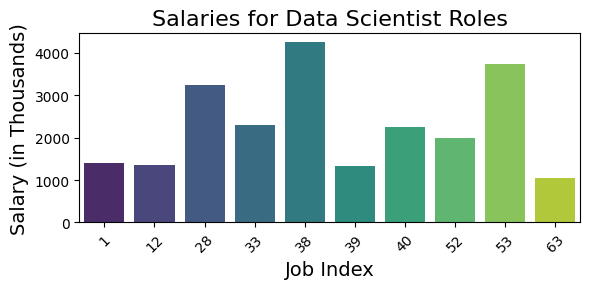

In [23]:
#Sort the data by Salary_in_Thousands
ideal_job_salary_sorted = ideal_job_salary.sort_values(by='Salary_in_Thousands')
#print(ideal_job_salary_sorted.info())

# Create the bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=ideal_job_salary_sorted.index, y='Salary_in_Thousands', data=ideal_job_salary_sorted, 
            #hue=ideal_job_salary_sorted.index, legend=False, 
            palette='viridis')

# Add titles and labels
plt.title('Salaries for Data Scientist Roles', fontsize=16)
plt.xlabel('Job Index', fontsize=14)
plt.ylabel('Salary (in Thousands)', fontsize=14)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

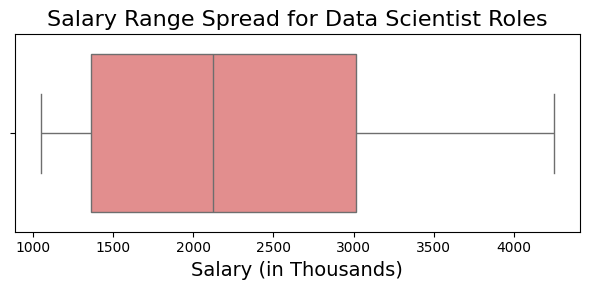

In [24]:
# Create the box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x='Salary_in_Thousands', data=ideal_job_salary_sorted, color='lightcoral')

# Add titles and labels
plt.title('Salary Range Spread for Data Scientist Roles', fontsize=16)
plt.xlabel('Salary (in Thousands)', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

#### Average Salary is around 2100 thousand INR PA, with min from 100K to max upto 4000K. However there is not enough data available for Salary and most of the Jobs were listed without specifying any Salary Range.

In [25]:
ideal_job_titles.Salary_Range.value_counts().head(10)

Salary_Range
Not disclosed    903
20-35 Lacs PA     11
15-25 Lacs PA      6
Unpaid             5
10-20 Lacs PA      5
30-45 Lacs PA      3
16-30 Lacs PA      3
17-30 Lacs PA      3
20-30 Lacs PA      3
15-30 Lacs PA      3
Name: count, dtype: int64

In [26]:
# Example function to convert experience to a single numeric value in years
def convert_experience_to_years(experience):    
    # Experience is in 3-4+ years format. It's a string
    if isinstance(experience, str):
        # First remove all non numeric items like years, yrs, +
        experience = re.sub(r'(years|\+|yrs)', '', experience, flags=re.IGNORECASE).strip()
        # Handle ranges like 3-5 convert it to average range
        if '-' in experience:
            min_years, max_years = experience.split('-')
            return (float(min_years.strip()) + float(max_years.strip())) / 2
        
        # Handle 
        else:
            return float(experience.strip())
    else:
        # If experience is already a number or cannot be parsed, return as is or NaN
        return pd.to_numeric(experience, errors='coerce')

# Apply the conversion to the 'Experience' column
if 'Years_of_Experience' in ideal_job_salary_sorted.columns:
    ideal_job_salary_sorted.drop(columns='Years_of_Experience', inplace=True)
    
ideal_job_salary_sorted['Years_of_Experience'] = ideal_job_salary_sorted['Experience'].apply(convert_experience_to_years)


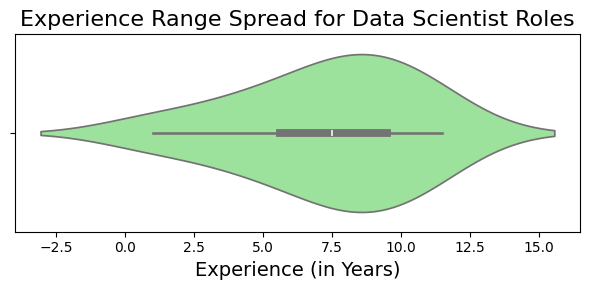

In [27]:
# Create the box plot
plt.figure(figsize=(6, 3))
sns.violinplot(x='Years_of_Experience', data=ideal_job_salary_sorted, color='lightgreen')

# Add titles and labels
plt.title('Experience Range Spread for Data Scientist Roles', fontsize=16)
plt.xlabel('Experience (in Years)', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

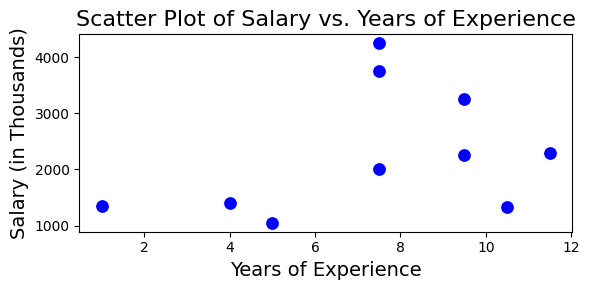

In [28]:
# Create the scatter plot
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Years_of_Experience', y='Salary_in_Thousands', data=ideal_job_salary_sorted, color='blue', s=100)

# Add titles and labels
plt.title('Scatter Plot of Salary vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Salary (in Thousands)', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

#### We didn't observed any clear linear relationship between salary and experience. This can't be depended as too few jobs were posted with Salary Range details.

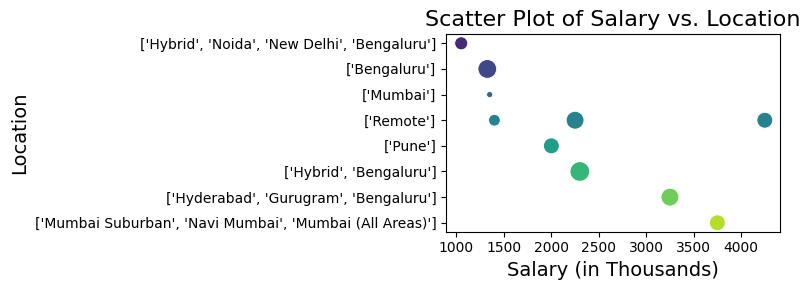

In [29]:
# Create the scatter plot for all locations, with Salary in Thousand
plt.figure(figsize=(8, 3))
sns.scatterplot(x='Salary_in_Thousands', y='Location', data=ideal_job_salary_sorted, hue='Location', 
                size='Years_of_Experience', palette='viridis', s=100, legend=False, sizes=(20, 200))

# Add titles and labels
plt.title('Scatter Plot of Salary vs. Location', fontsize=16)
plt.xlabel('Salary (in Thousands)', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

#### There seems to be a negative linear relationship exists between Location, Experience and Salary, however too fewer observations are available for salary range, plus jobs are being posted with more than 1 locations for a single job listing. Hence it can't be deduced with only this data.

---
# C. Your ideal Job with required Skills
---

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\2302856690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ideal_job_titles.Fixed_Title.value_counts(), y=ideal_job_titles.Fixed_Title.value_counts().index,
C:\Users\smkamran\AppData\Local\Temp\ipykernel_15728\2302856690.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, ax=axes[1], palette='Greens_d',


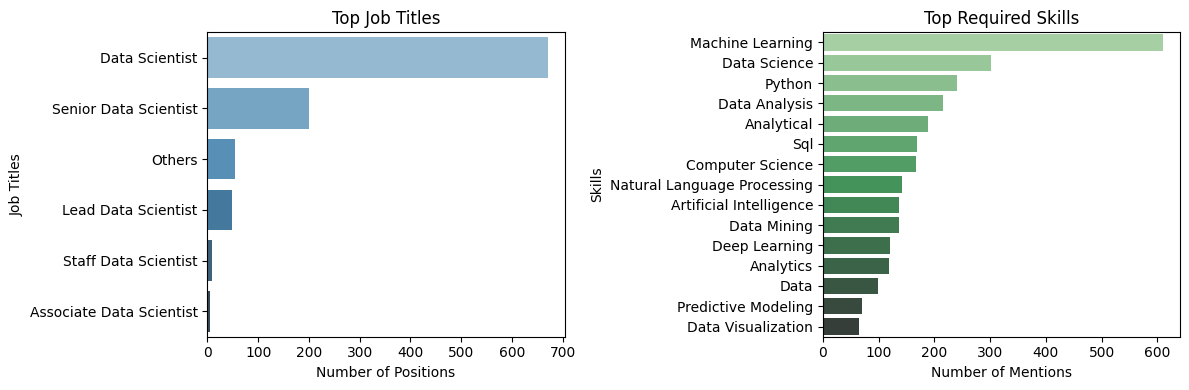

In [30]:
# Required Skills for the Ideal Jost (Data Scientist)

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First plot: Top Job Titles
sns.barplot(x=ideal_job_titles.Fixed_Title.value_counts(), y=ideal_job_titles.Fixed_Title.value_counts().index, 
            ax=axes[0], palette='Blues_d', #hue=ideal_job_titles.Fixed_Title.value_counts().index, legend=False
           )
axes[0].set_title('Top Job Titles', fontsize=12)
axes[0].set_xlabel('Number of Positions', fontsize=10)
axes[0].set_ylabel('Job Titles', fontsize=10)

# Second plot: Top 15 Required Skills
sns.barplot(x=top_skills.values, y=top_skills.index, ax=axes[1], palette='Greens_d',
            #hue=top_skills.index, legend=False
           )
axes[1].set_title('Top Required Skills', fontsize=12)
axes[1].set_xlabel('Number of Mentions', fontsize=10)
axes[1].set_ylabel('Skills', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()